In [1]:
# program using Logistic Regression to prediction hand written numbers
# author Hoan Ngo (Feb 20, 2022)
from sklearn.preprocessing import StandardScaler
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
from sklearn import datasets
import numpy as np
feature_1 = 2
feature_2 = 3
labels = ['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width']
X, y = datasets.load_digits(return_X_y=True)


In [2]:
#explore shape of X
X.shape

(1797, 64)

In [3]:
#explore first 5 examples
print(X[:5,:])

[[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
  15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
   0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
   0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]
 [ 0.  0.  0. 12. 13.  5.  0.  0.  0.  0.  0. 11. 16.  9.  0.  0.  0.  0.
   3. 15. 16.  6.  0.  0.  0.  7. 15. 16. 16.  2.  0.  0.  0.  0.  1. 16.
  16.  3.  0.  0.  0.  0.  1. 16. 16.  6.  0.  0.  0.  0.  1. 16. 16.  6.
   0.  0.  0.  0.  0. 11. 16. 10.  0.  0.]
 [ 0.  0.  0.  4. 15. 12.  0.  0.  0.  0.  3. 16. 15. 14.  0.  0.  0.  0.
   8. 13.  8. 16.  0.  0.  0.  0.  1.  6. 15. 11.  0.  0.  0.  1.  8. 13.
  15.  1.  0.  0.  0.  9. 16. 16.  5.  0.  0.  0.  0.  3. 13. 16. 16. 11.
   5.  0.  0.  0.  0.  3. 11. 16.  9.  0.]
 [ 0.  0.  7. 15. 13.  1.  0.  0.  0.  8. 13.  6. 15.  4.  0.  0.  0.  2.
   1. 13. 13.  0.  0.  0.  0.  0.  2. 15. 11.  1.  0.  0.  0.  0.  0.  1.
  12. 12.  1.  0.  0.  0.  0.  0.  1. 10.  8.  0.  0.  0.

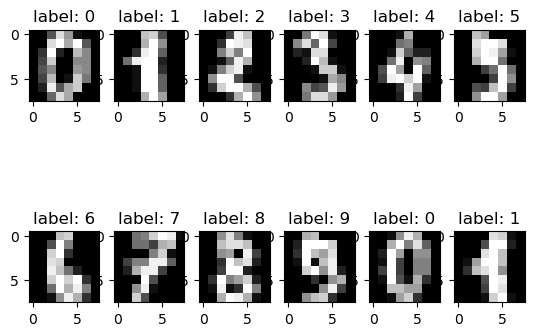

In [4]:
#plot first 12 examples with ground truth label
from matplotlib import pyplot as plt
fig = plt.figure()
for i in range(12):
    ax = fig.add_subplot(2, 6, i+1)
    ax.imshow(np.reshape(X[i,:], (8, 8)), interpolation='nearest', cmap='gray')
    ax.set_title(f'label: {y[i]}')
plt.show()

In [5]:
y.shape

(1797,)

In [6]:
print(y[:12])

[0 1 2 3 4 5 6 7 8 9 0 1]


In [7]:
#split the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

In [8]:
# Standardize the features
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.fit_transform(X_test)

In [9]:
#print size of 
print(f'All {np.bincount(y)}')
print(f'Train {np.bincount(y_train)}')
print(f'Test {np.bincount(y_test)}')

All [178 182 177 183 181 182 181 179 174 180]
Train [124 127 124 128 127 127 127 125 122 126]
Test [54 55 53 55 54 55 54 54 52 54]


In [10]:
# train a LR model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

lr = LogisticRegression(C=10.0, solver='lbfgs', multi_class='multinomial')
lr.fit(X_train_std, y_train)

c:\Users\yendi\miniforge3\envs\pyml-book\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=10.0, multi_class='multinomial')

In [11]:
#make predictions on the test dataset and compare with truth label to calculate accuracy score
y_pred = lr.predict(X_test_std)
print(lr.predict_proba(X_test_std[:5, :]))
print(f'Misclassified examples: {(y_test != y_pred).sum()}')
print(f'Accuracy {accuracy_score(y_pred, y_test)}')

[[1.97210875e-11 9.99988526e-01 7.47966740e-11 1.34378994e-08
  6.00159104e-07 5.18593552e-10 8.80109813e-09 4.72194911e-10
  1.05655063e-06 9.79422733e-06]
 [1.30048509e-07 6.87155528e-13 7.28626001e-05 9.92299686e-01
  2.48498514e-08 4.60176786e-08 1.06071546e-07 5.68701399e-08
  9.01888749e-04 6.72519831e-03]
 [8.01497762e-04 2.48375057e-04 3.07986111e-08 1.60595071e-02
  3.38515800e-02 7.05292967e-05 2.21018620e-05 9.21137865e-01
  2.00948636e-02 7.71364975e-03]
 [9.99904281e-01 2.45081746e-12 6.95618012e-05 7.17104269e-06
  4.84957833e-09 7.86117247e-06 3.62482370e-07 1.05818998e-05
  3.63646859e-08 1.39120748e-07]
 [5.48092021e-11 7.79475128e-07 3.19957297e-19 5.41823402e-18
  9.99999202e-01 5.31335095e-12 5.02645195e-09 1.38886354e-08
  2.27887394e-13 1.62844839e-17]]
Misclassified examples: 18
Accuracy 0.9666666666666667


In [12]:
#print prediction on first 5 test examples
print(y_pred[:5])

[1 3 7 0 4]


In [13]:
#ground truth of first 5 test examples
y_test[:5]

array([1, 3, 7, 0, 4])

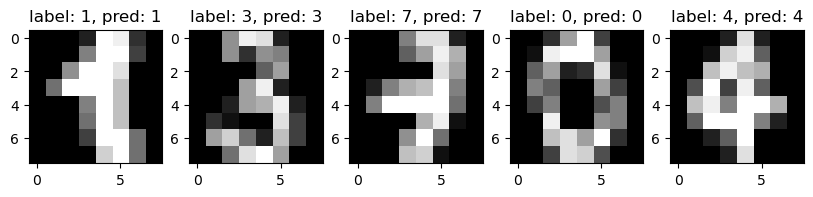

<Figure size 640x480 with 0 Axes>

In [14]:
#plot first 5 test examples with ground truth and predictions
from matplotlib import pyplot as plt
fig = plt.figure(figsize= [10, 4])
for i in range(5):
    ax = fig.add_subplot(1, 5, i+1)
    ax.imshow(np.reshape(X_test[i,:], (8, 8)), interpolation='nearest', cmap='gray')
    ax.set_title(f'label: {y_test[i]}, pred: {y_pred[i]}')
plt.show()
plt.tight_layout()

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
 
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        54
           1       0.96      0.96      0.96        55
           2       1.00      0.96      0.98        53
           3       0.98      0.96      0.97        55
           4       0.98      0.96      0.97        54
           5       0.95      0.95      0.95        55
           6       0.98      0.96      0.97        54
           7       0.98      0.98      0.98        54
           8       0.92      0.94      0.93        52
           9       0.93      0.98      0.95        54

    accuracy                           0.97       540
   macro avg       0.97      0.97      0.97       540
weighted avg       0.97      0.97      0.97       540



c:\Users\yendi\miniforge3\envs\pyml-book\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


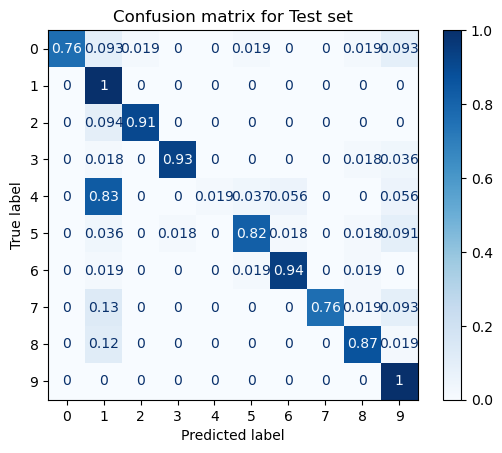

In [20]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt


cm = confusion_matrix(y_test, y_pred)
matrix = plot_confusion_matrix(lr ,X_test, y_test, cmap = plt.cm.Blues, normalize = 'true')
plt.title('Confusion matrix for Test set')
plt.show(matrix)
plt.show()
#print(cm)


c:\Users\yendi\miniforge3\envs\pyml-book\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\yendi\miniforge3\envs\pyml-book\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Misclassified examples: 18
Accuracy 0.9666666666666667
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        54
           1       0.96      0.96      0.96        55
           2       1.00      0.96      0.98        53
           3       0.98      0.96      0.97        55
           4       0.98      0.96      0.97        54
           5       0.95      0.95      0.95        55
           6       0.98      0.96      0.97        54
           7       0.98      0.98      0.98        54
           8       0.92      0.94      0.93        52
           9       0.93      0.98      0.95        54

    accuracy                           0.97       540
   macro avg       0.97      0.97      0.97       540
weighted avg       0.97      0.97      0.97       540



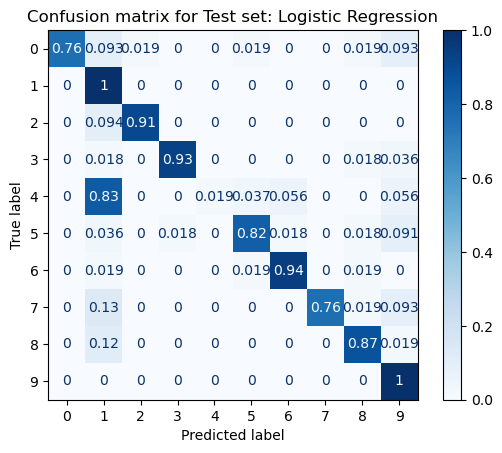

In [25]:
# train a LR model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

lr = LogisticRegression(C=10.0, solver='lbfgs', multi_class='multinomial')
lr.fit(X_train_std, y_train)

#make predictions on the test dataset and compare with truth label to calculate accuracy score
y_pred = lr.predict(X_test_std)
print(f'Misclassified examples: {(y_test != y_pred).sum()}')
print(f'Accuracy {accuracy_score(y_pred, y_test)}')

print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
matrix = plot_confusion_matrix(lr ,X_test, y_test, cmap = plt.cm.Blues, normalize = 'true')
plt.title('Confusion matrix for Test set: Logistic Regression')
plt.show(matrix)
plt.show()

SVM Testing
Misclassified examples: 12
Accuracy 0.9777777777777777
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        54
           1       0.92      1.00      0.96        55
           2       1.00      1.00      1.00        53
           3       1.00      0.96      0.98        55
           4       1.00      1.00      1.00        54
           5       0.96      0.96      0.96        55
           6       0.98      1.00      0.99        54
           7       0.98      1.00      0.99        54
           8       0.96      0.88      0.92        52
           9       0.98      0.96      0.97        54

    accuracy                           0.98       540
   macro avg       0.98      0.98      0.98       540
weighted avg       0.98      0.98      0.98       540



c:\Users\yendi\miniforge3\envs\pyml-book\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


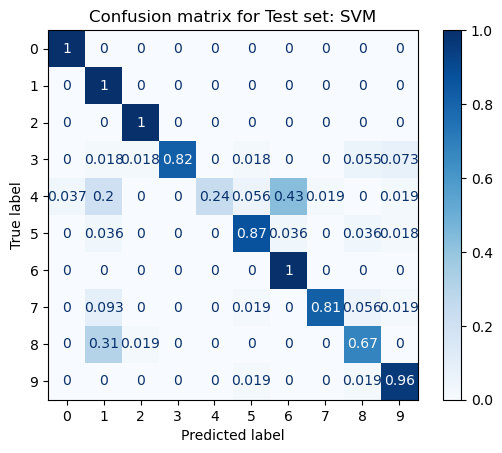

In [29]:
# train a SVC model
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

sModel = SVC(kernel='linear', C=1.0, random_state=1)
sModel.fit(X_train_std, y_train)

#make predictions on the test dataset and compare with truth label to calculate accuracy score
y_pred = sModel.predict(X_test_std)
print("SVM Testing")
print(f'Misclassified examples: {(y_test != y_pred).sum()}')
print(f'Accuracy {accuracy_score(y_pred, y_test)}')

print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
matrix = plot_confusion_matrix(sModel ,X_test, y_test, cmap = plt.cm.Blues, normalize = 'true')
plt.title('Confusion matrix for Test set: SVM')
plt.show(matrix)
plt.show()

KNeighbor Testing
Misclassified examples: 17
Accuracy 0.9685185185185186
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        54
           1       0.93      0.98      0.96        55
           2       0.96      0.98      0.97        53
           3       0.98      0.93      0.95        55
           4       0.98      0.94      0.96        54
           5       0.98      0.98      0.98        55
           6       0.98      0.98      0.98        54
           7       0.96      0.98      0.97        54
           8       0.96      0.94      0.95        52
           9       0.95      0.96      0.95        54

    accuracy                           0.97       540
   macro avg       0.97      0.97      0.97       540
weighted avg       0.97      0.97      0.97       540



c:\Users\yendi\miniforge3\envs\pyml-book\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


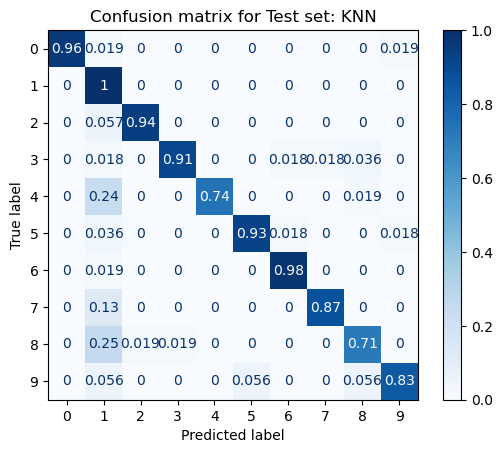

In [34]:
# train a KNeighbors model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

kModel = KNeighborsClassifier(n_neighbors=5, p=5,metric='minkowski')
kModel.fit(X_train_std, y_train)

#make predictions on the test dataset and compare with truth label to calculate accuracy score
y_pred = kModel.predict(X_test_std)
print("KNeighbor Testing")
print(f'Misclassified examples: {(y_test != y_pred).sum()}')
print(f'Accuracy {accuracy_score(y_pred, y_test)}')

print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
matrix = plot_confusion_matrix(kModel ,X_test, y_test, cmap = plt.cm.Blues, normalize = 'true')
plt.title('Confusion matrix for Test set: KNN')
plt.show(matrix)
plt.show()

KNeighbor Testing
Misclassified examples: 14
Accuracy 0.9740740740740741
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        54
           1       0.95      1.00      0.97        55
           2       1.00      0.98      0.99        53
           3       1.00      1.00      1.00        55
           4       0.98      0.98      0.98        54
           5       0.95      0.96      0.95        55
           6       0.98      0.96      0.97        54
           7       0.96      0.98      0.97        54
           8       0.94      0.92      0.93        52
           9       0.98      0.96      0.97        54

    accuracy                           0.97       540
   macro avg       0.97      0.97      0.97       540
weighted avg       0.97      0.97      0.97       540



c:\Users\yendi\miniforge3\envs\pyml-book\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


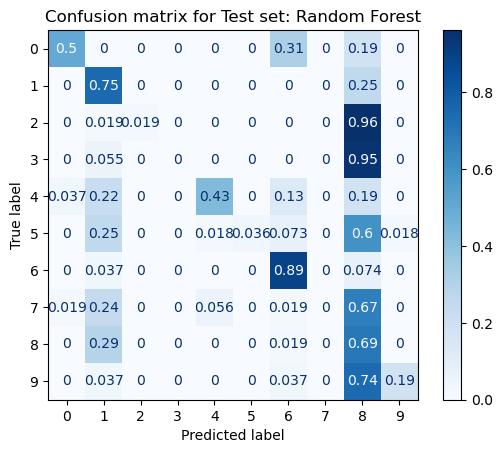

In [45]:
# train a RandomForest model
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

fModel = RandomForestClassifier(n_estimators=50, random_state=3, n_jobs=4)
fModel.fit(X_train_std, y_train)

#make predictions on the test dataset and compare with truth label to calculate accuracy score
y_pred = fModel.predict(X_test_std)
print("RandomForest Testing")
print(f'Misclassified examples: {(y_test != y_pred).sum()}')
print(f'Accuracy {accuracy_score(y_pred, y_test)}')

print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
matrix = plot_confusion_matrix(fModel ,X_test, y_test, cmap = plt.cm.Blues, normalize = 'true')
plt.title('Confusion matrix for Test set: Random Forest')
plt.show(matrix)
plt.show()

Perceptron Testing
Misclassified examples: 35
Accuracy 0.9351851851851852
              precision    recall  f1-score   support

           0       0.91      0.98      0.95        54
           1       0.89      0.93      0.91        55
           2       0.96      0.96      0.96        53
           3       0.93      0.95      0.94        55
           4       0.89      0.94      0.92        54
           5       0.96      0.95      0.95        55
           6       0.96      0.96      0.96        54
           7       0.98      0.94      0.96        54
           8       0.93      0.75      0.83        52
           9       0.93      0.98      0.95        54

    accuracy                           0.94       540
   macro avg       0.94      0.93      0.93       540
weighted avg       0.94      0.94      0.93       540



c:\Users\yendi\miniforge3\envs\pyml-book\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


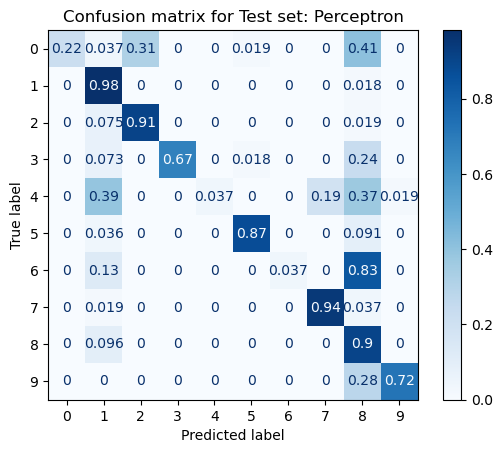

In [54]:
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

pModel = Perceptron(eta0=0.1, random_state=1)
pModel.fit(X_train_std, y_train)

#make predictions on the test dataset and compare with truth label to calculate accuracy score
y_pred = pModel.predict(X_test_std)
print("Perceptron Testing")
print(f'Misclassified examples: {(y_test != y_pred).sum()}')
print(f'Accuracy {accuracy_score(y_pred, y_test)}')

print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
matrix = plot_confusion_matrix(pModel ,X_test, y_test, cmap = plt.cm.Blues, normalize = 'true')
plt.title('Confusion matrix for Test set: Perceptron')
plt.show(matrix)
plt.show()

DecisionTree Testing
Misclassified examples: 76
Accuracy 0.8592592592592593
              precision    recall  f1-score   support

           0       0.96      0.91      0.93        54
           1       0.84      0.87      0.86        55
           2       0.87      0.87      0.87        53
           3       0.78      0.91      0.84        55
           4       0.89      0.74      0.81        54
           5       0.87      0.85      0.86        55
           6       0.88      0.93      0.90        54
           7       0.80      0.91      0.85        54
           8       0.89      0.75      0.81        52
           9       0.85      0.85      0.85        54

    accuracy                           0.86       540
   macro avg       0.86      0.86      0.86       540
weighted avg       0.86      0.86      0.86       540



c:\Users\yendi\miniforge3\envs\pyml-book\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


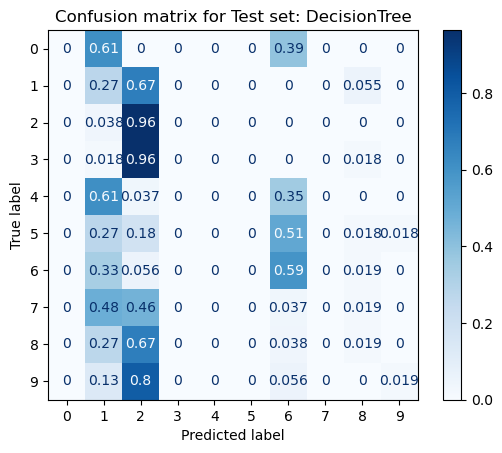

In [61]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

tModel = DecisionTreeClassifier(criterion='gini', max_depth=20, random_state=1)
tModel.fit(X_train_std, y_train)

#make predictions on the test dataset and compare with truth label to calculate accuracy score
y_pred = tModel.predict(X_test_std)
print("DecisionTree Testing")
print(f'Misclassified examples: {(y_test != y_pred).sum()}')
print(f'Accuracy {accuracy_score(y_pred, y_test)}')

print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
matrix = plot_confusion_matrix(tModel ,X_test, y_test, cmap = plt.cm.Blues, normalize = 'true')
plt.title('Confusion matrix for Test set: DecisionTree')
plt.show(matrix)
plt.show()